# Selenium Tutorial

**Description:**

*Selenium is a **robust** and **versatile** automation framework that empowers users to automate web browsers for **testing** and various web-related tasks. It offers a suite of tools and libraries that facilitate the automation of web interactions, allowing users to simulate user actions such as **clicking buttons**, **entering text**, and **navigating** through web pages.*

*There are many reasons to use Selenium, but its most significant advantages lie in its **dynamic interaction capabilities** and **the automation of web interactions**. Unlike traditional scraping libraries like BeautifulSoup, which cannot interact with page elements dynamically, Selenium facilitates scraping from websites that require interaction, such as clicking buttons or filling out forms. These features enable Selenium to effectively navigate and interact with complex web environments, making it an indispensable tool for data-driven tasks.*

*For data scientists, Selenium can be crucial for **automating the extraction of data from websites that require user interaction**, such as e-commerce platforms, financial sites, and social media. By automating these tasks, Selenium allows data scientists to gather large volumes of real-time data efficiently, which is essential for timely analytics and decision making.*

### Main functions ###


**find_element_by** functions in Selenium provide a variety of methods to locate and interact with elements on a web page based on different attributes and criteria. Each function serves a specific purpose and can be used based on the unique characteristics of the elements you are trying to access.

- `find_element(By.ID, 'id')`: Locates an element by its unique id attribute.
- `find_element(By.NAME, 'name')`: Finds an element by its name attribute.
- `find_element(By.XPATH, 'xpath')`: Locates an element using an XPath expression.
- `find_element(By.LINK_TEXT, 'link_text')`: Finds an anchor element by its visible text.
- `find_element(By.PARTIAL_LINK_TEXT, 'partial_link_text')`: Locates an anchor element by a partial match of its visible text.
- `find_element(By.TAG_NAME, 'tag_name')`: Finds elements by their HTML tag name.
- `find_element(By.CLASS_NAME, 'class_name')`: Locates elements by their CSS class name.
- `find_element(By.CSS_SELECTOR, 'css_selector')`: Finds elements using CSS selectors.

<h3>find_element(By.ID, 'id')</h3>

To retrieve the main logo element from the header of this page, you can inspect the element's id and utilize the [find_element()](file:///Users/lee/PycharmProjects/Trillionaire#7%2C16-7%2C16) function with the `By.ID` parameter.

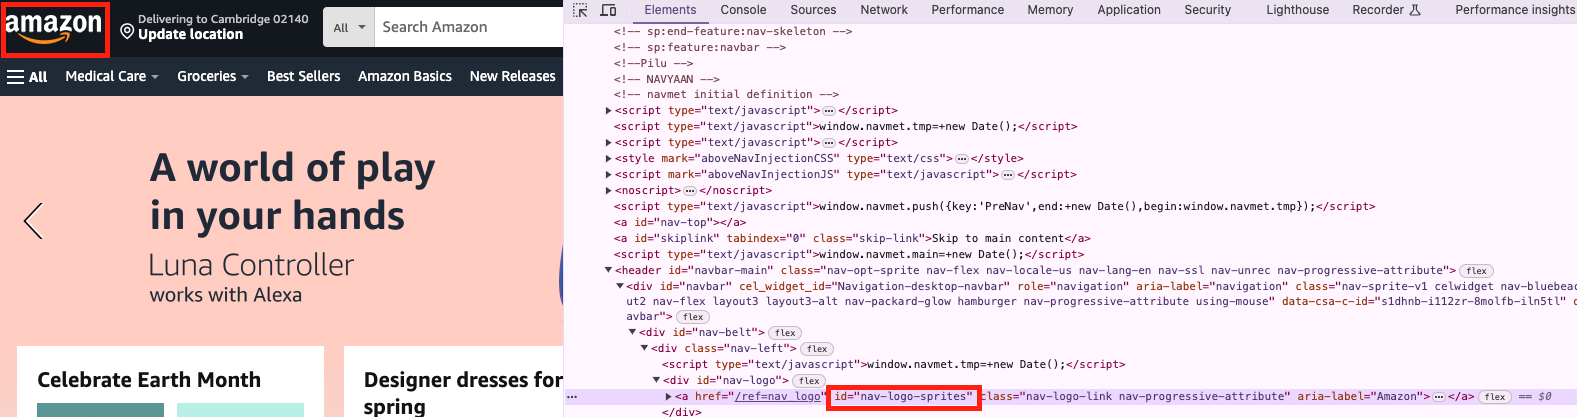

<h3>find_elements(By.ID, 'id')</h3>

If there are multiple elements with the same id, you can use the `find_elements` function to retrieve them. The elements are stored as a list.

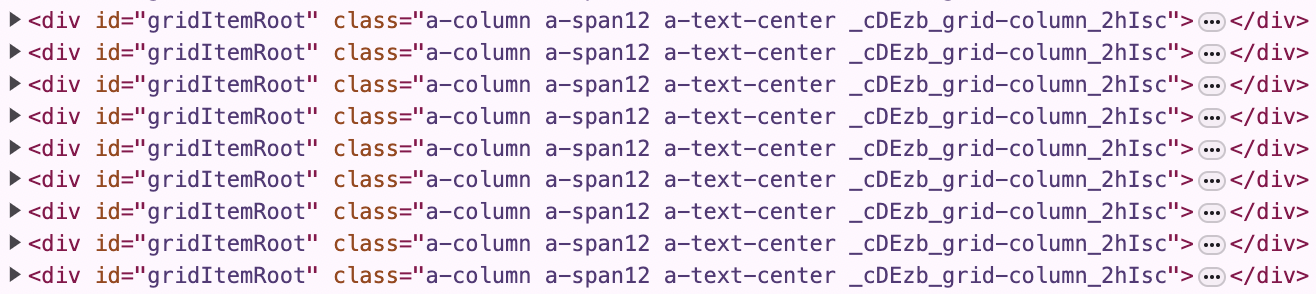

<h3>Easy way to check element</h3>

After right-clicking, select "Inspect" to open the developer tools on your web browser and examine the elements.

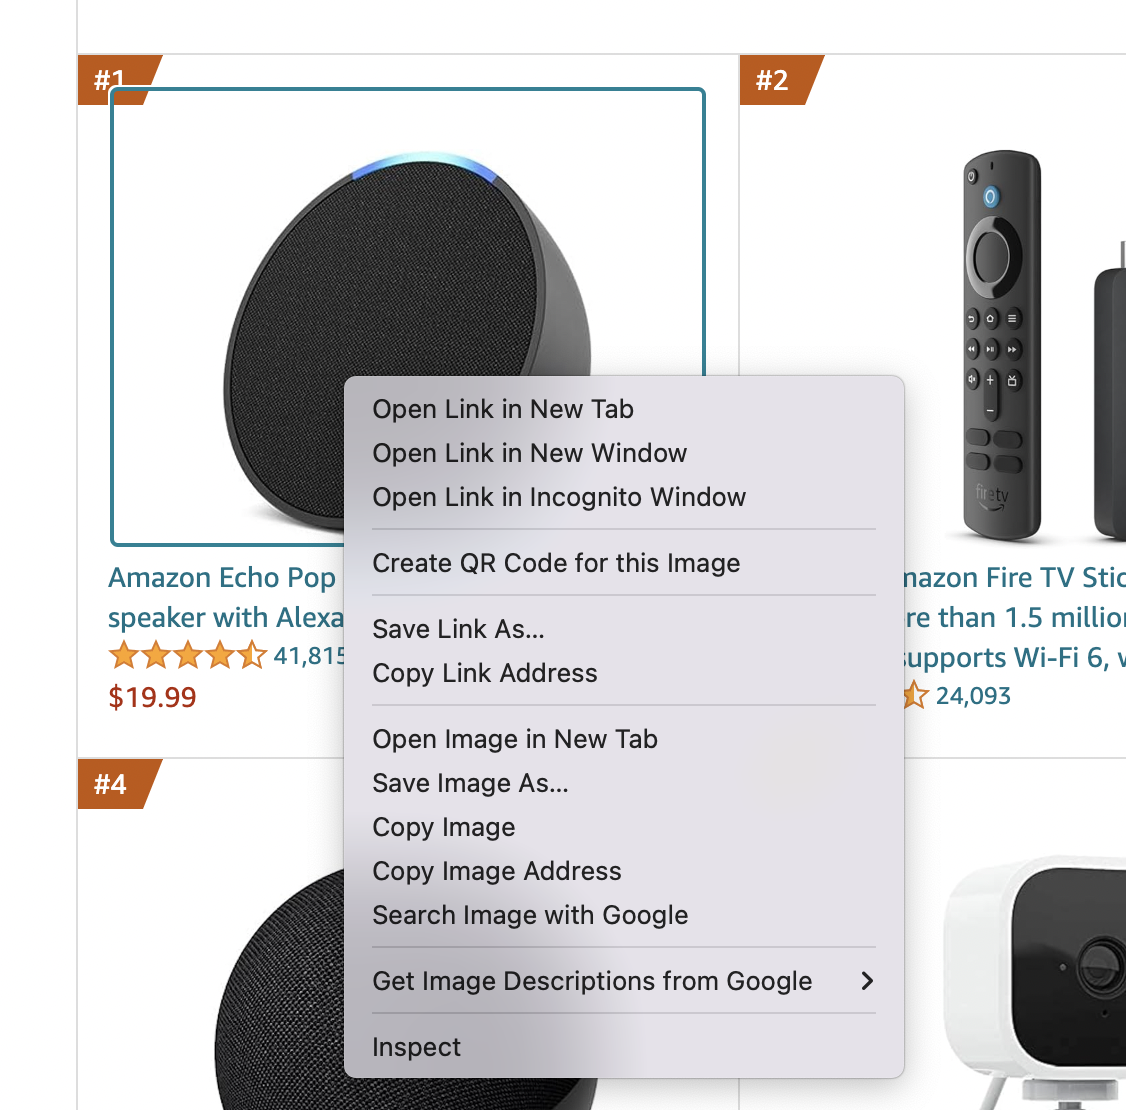


<h3>Copy Element</h3>

Copy the element or XPath, etc., from the developer tools.

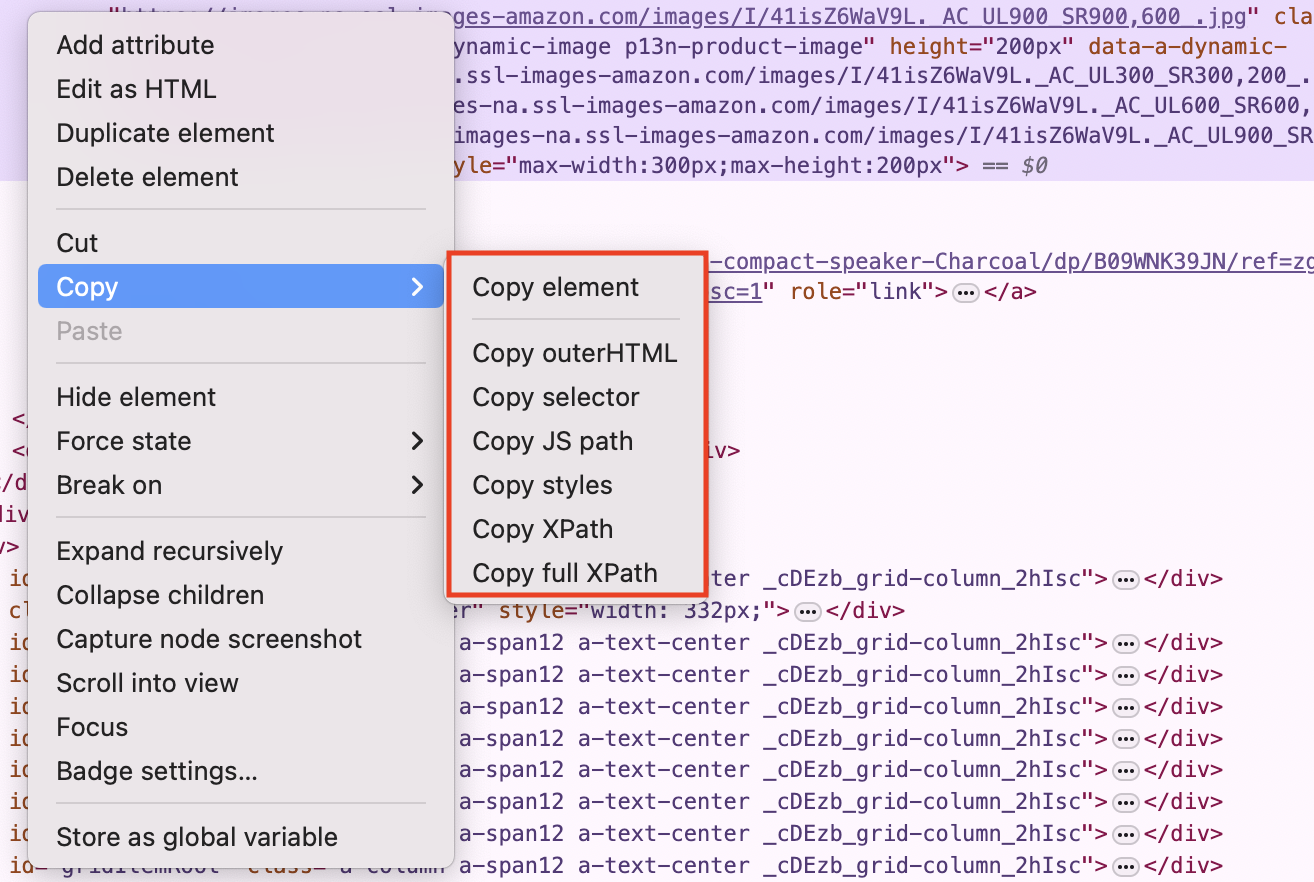

<h2>Setting up your environment</h2>

**Note:** This tutorial is specifically written for the Jupyter Notebook environment and Chrome Browser. Please download Chrome Browser if you haven't installed in your computer.

1. **Install Selenium Package**:
   - Uses `pip` to install the Selenium package

2. **Update Package List**:
   - Runs `apt-get update` command to update the package list

3. **Install Chromium Chromedriver**:
   - Installs the `chromium-chromedriver` package

4. **Copy Chromedriver Executable**:
   - Copies the `chromedriver` executable from `/usr/lib/chromium-browser` to `/usr/bin` to make it accessible system-wide.

5. **Install Chromedriver Autoinstaller**:
   - Installs the `chromedriver-autoinstaller` package

6. **Add Chromedriver Directory to System Path**:
   - Inserts the directory containing the `chromedriver` executable into the system path for Selenium to locate the driver.

In [1]:
import IPython

# This will run the pip command and suppress its output
IPython.get_ipython().system('pip install selenium')
IPython.get_ipython().system('apt-get update')
IPython.get_ipython().system('apt install chromium-chromedriver -y')
IPython.get_ipython().system('cp /usr/lib/chromium-browser/chromedriver /usr/bin')
IPython.get_ipython().system('pip install chromedriver-autoinstaller')

import sys
# Add the directory containing the chromedriver executable to the system path
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

/bin/bash: apt-get: command not found
The operation couldn’t be completed. Unable to locate a Java Runtime.
Please visit http://www.java.com for information on installing Java.

cp: /usr/lib/chromium-browser/chromedriver: No such file or directory


In [2]:
from bs4 import BeautifulSoup
from selenium import webdriver
from datetime import datetime
import json
import chromedriver_autoinstaller
import csv, os, re
import pandas as pd
import time

from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By

**Note:** The code below sets up a headless Chrome WebDriver with specific options and configurations for automated browser interactions, ensuring the Chromedriver is installed and ready for use.

1. **Configure Chrome Options**:
   - Create a `chrome_options` object using `webdriver.ChromeOptions()` to customize Chrome settings.
   - Add arguments to the options object for headless mode, no sandbox, and disabling shared memory usage.

2. **Install Chromedriver**:
   - Use `chromedriver_autoinstaller.install()` to automatically download and install the Chromedriver.

3. **Create WebDriver Instance**:
   - Initialize a Chrome WebDriver instance named `driver` using `webdriver.Chrome()` with the configured `chrome_options`.


In [3]:
chrome_options = webdriver.ChromeOptions()                      # Create object ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
chromedriver_autoinstaller.install()
driver= webdriver.Chrome(options=chrome_options)                # Create driver

<h2>Example Scenario</h2>

**Scenario Description:**

In this example scenario, we will automate the process of scraping data from the Amazon website's Best Sellers section. The goal is to extract information such as the rank, name, price, and review counts of all items listed in the Best Sellers category.

**Steps:**

1. Navigate to the Best Sellers with specific department section on the Amazon website.
2. Scrape data for each item, including its rank, name, price, and review counts.
3. Store the extracted data in a CSV file for further analysis or processing.

By automating this task, we can efficiently gather valuable information from the Amazon Best Sellers page and organize it in a structured format for analysis or reporting purposes.

<h3>1. Connecting url</h3>

Connect to a URL using the installed driver, navigate to the page containing the items data to be retrieved. Employ a `try-except` block, `WebDriverWait`, and `EC` to handle potential errors such as encountering error page like the picture below the cell or elements loading before the page is fully loaded. This approach ensures robustness when screening the initial URL and finding the necessary elements.

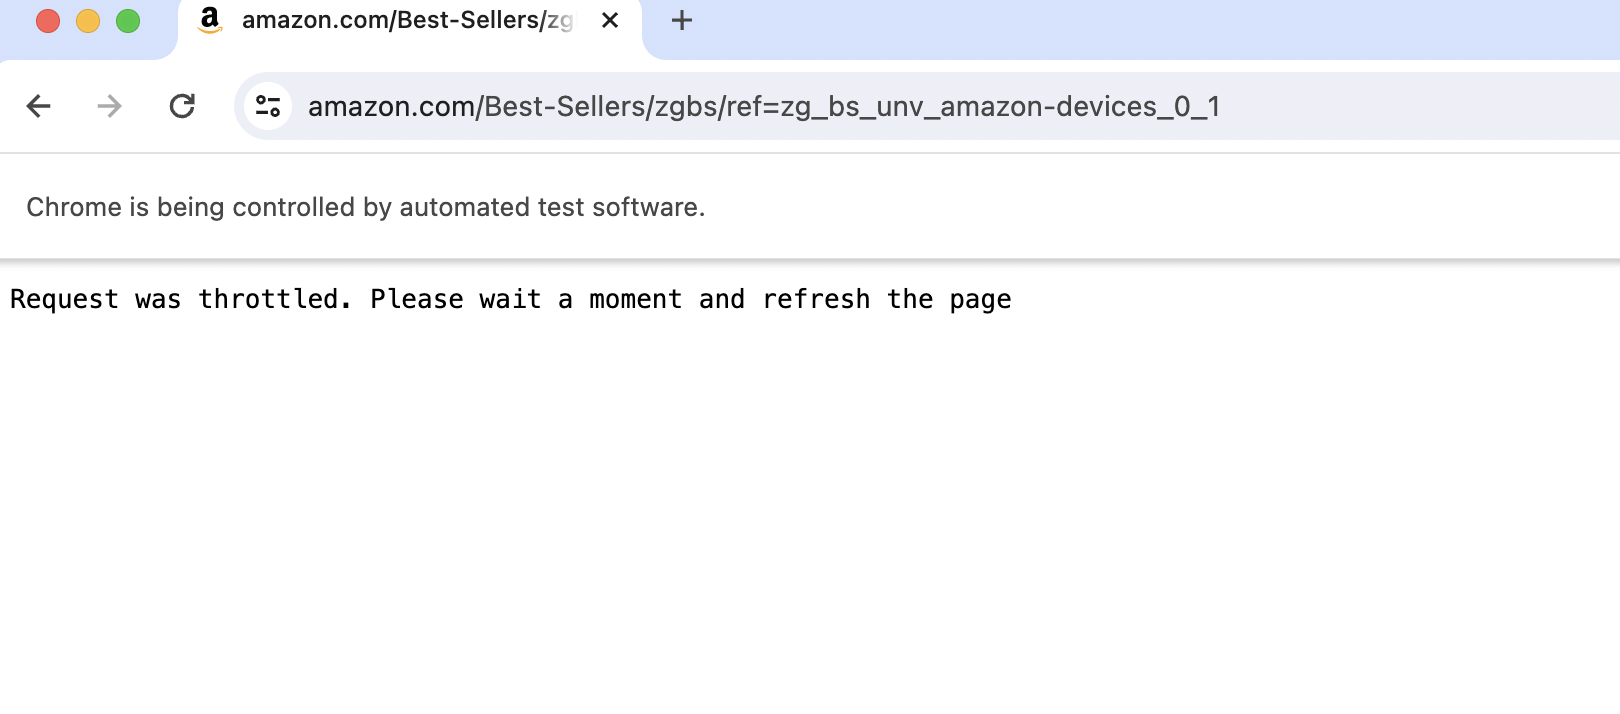



In [4]:
url="https://www.amazon.com/Best-Sellers/zgbs/ref=zg_bs_unv_amazon-devices_0_1"        # Page URL
driver.get(url)

In [5]:
while(True):
    try:
        wait = WebDriverWait(driver, 5)
        # Wait for the element on the left side menu that contains categories
        left_side_menu_element = wait.until(EC.presence_of_element_located((By.ID, 'zg_left_col2')))
        # Find all the links to bestseller pages for each category
        elements = left_side_menu_element.find_elements(By.TAG_NAME, 'a') 
    except TimeoutException:
        driver.refresh()
    else:
        break

<h3>2. Initialization and CSV File Setup</h3>

Before retrieving data from the website, the code initializes a list to store the data and creates a CSV file to save the extracted information locally.
Name of the CSV file contains combination of page title and current date 

In [6]:
# Get first category's link and name
category_link = elements[0].get_attribute('href')
category_name = elements[0].text

# Move page to the link
driver.get(category_link)
driver.implicitly_wait(10)
html_content = driver.page_source

soup = BeautifulSoup(html_content, 'html.parser')
Titlefile = soup.title.text
# get current date and time with a safe format for filenames
current_date = datetime.now().strftime('%Y-%m-%d %H_%M_%S')
# filename = Titlefile + f'{current_date}.csv'


In [7]:

def sanitize_filename(filename):
    """Remove or replace invalid characters in filenames."""
    # Replace colons and other non-alphanumeric characters
    sanitized = re.sub(r'[^a-zA-Z0-9\-_\. ]', '_', filename)
    return sanitized

# Initialize the lists
date_list = []
category_name_list = []
item_name_list = []
item_rank_list = []
item_review_count_list = []
item_price_list = []

# Filename is defined elsewhere and contains potentially unsafe characters
filename = sanitize_filename(Titlefile) + f'{current_date}.csv'

# create csv file path where the file will be saved
directory = os.path.expanduser('~/Downloads/Feature_Extraction_Data/')
os.makedirs(directory, exist_ok=True)  # Ensure directory exists
csv_file_path = os.path.join(directory, filename)

try:
    with open(csv_file_path, 'w', newline='', encoding='utf-8') as file:
        # Open the file in write mode
        writer = csv.writer(file)
        # Write the header
        writer.writerow(['Date', 'Category', 'Name', 'Rank in Category', 'Review Count', 'Price'])
except OSError as e:
    print(f"Error: {e}")


<h3>3. Defining scraping function</h3>

To extract all item data on the page, make sure to scroll down to load the complete content. In cases of infinite scrolling, scraping may retrieve only a portion of the data unless the page is fully scrolled to load all items.

In [8]:
def scrap_item_data(category_name):
    # Element to which the scroll should be directed
    end_of_list = driver.find_element(By.ID, 'endOfList')
    # Scroll down until the end of the list, So it will load all the items
    driver.execute_script("arguments[0].scrollIntoView(true);", end_of_list)
    # Wait for the page to load
    time.sleep(5)
    # Find all the items in the list
    boxes = driver.find_elements(By.ID, 'gridItemRoot')

    # Save all the data in each lists
    for box in boxes:
        print(box.text, '\n')
        date_list.append(current_date)
        category_name_list.append(category_name)
        item_rank_list.append(box.text.split('\n')[0][1:]) # remove the hash symbol (e.g #2)
        item_name_list.append(box.text.split('\n')[1])
        item_review_count_list.append(box.text.split('\n')[2].replace(',', '')) # remove the comma (e.g 37,000)
        # Append 'N/A' if the item does not have a price, otherwise extract the price
        # Case 1 : It does not have price tag element
        # Case 2 : It has price tag element and it has price
        # Case 3 : It has price tag element but it does not have price (e.g no offers)
        item_price_list.append('N/A' if len(box.text.split('\n')) < 4 else box.text.split('\n')[3].split('$')[1] if '$' in box.text.split('\n')[3] else 'N/A')


    return

<h3>4. Applying Scraping Process</h3>

When dealing with multiple pages, the process involves navigating to the next page after retrieving data from the current page. To achieve this, locate the element for the next page button and instruct the driver to navigate to it. If the next page button element cannot be found, it indicates that there are no more pages to navigate, thus concluding the process.

In [9]:
while(True):
    try:
        scrap_item_data(category_name)
        next_page_link = driver.find_element(By.CSS_SELECTOR, 'li.a-last a').get_attribute('href')
        driver.get(next_page_link)
        driver.implicitly_wait(10)
    except NoSuchElementException:
        break

#1
Amazon Echo Pop | Full sound compact smart speaker with Alexa | Charcoal
42,476
$19.99 

#2
Echo Dot (5th Gen, 2022 release) | With bigger vibrant sound, helpful routines and Alexa | Charcoal
99,639
$27.99 

#3
All-new Amazon Fire TV Stick 4K streaming device, more than 1.5 million movies and TV episodes, supports Wi-Fi 6, watch free & live TV
24,756
$29.99 

#4
Amazon Fire TV Stick, HD, sharp picture quality, fast streaming, free & live TV, Alexa Voice Remote with TV controls
465,978
$24.99 

#5
Amazon Echo Dot (5th Gen) with clock | Compact smart speaker with Alexa and enhanced LED display for at-a-glance clock, timers, weather, and more | Cloud Blue
69,056
$39.99 

#6
All-new Amazon Fire TV Stick 4K Max streaming device, supports Wi-Fi 6E, free & live TV without cable or satellite
18,714
$39.99 

#7
Blink Mini – Compact indoor plug-in smart security camera, 1080p HD video, night vision, motion detection, two-way audio, easy set up, Works with Alexa – 1 camera (White)
282,291
$29.

<h3>5. Saving data to CSV file</h3>

Store the values from all lists in the previously created CSV file.

In [10]:
with open(csv_file_path, 'a', newline='') as file:
  writer = csv.writer(file)
  # Write the data
  for date, category, name, rank, review_count, price in zip(date_list, category_name_list, item_name_list, item_rank_list, item_review_count_list, item_price_list):
      writer.writerow([date, category, name, rank, review_count, price])
  file.close()

<h3>6. Checking the result</h3>

In [11]:
try:
    df = pd.read_csv(csv_file_path, encoding='latin1')
except UnicodeDecodeError:
    print("Failed with latin1, trying with windows-1252")
    df = pd.read_csv(csv_file_path, encoding='windows-1252')


In [12]:
df.head()

,Date,Category,Name,Rank in Category,Review Count,Price
0,2024-05-02 11_14_27,Amazon Devices & Accessories,Amazon Echo Pop | Full sound compact smart spe...,1,42476,19.99
1,2024-05-02 11_14_27,Amazon Devices & Accessories,"Echo Dot (5th Gen, 2022 release) | With bigger...",2,99639,27.99
2,2024-05-02 11_14_27,Amazon Devices & Accessories,All-new Amazon Fire TV Stick 4K streaming devi...,3,24756,29.99
3,2024-05-02 11_14_27,Amazon Devices & Accessories,"Amazon Fire TV Stick, HD, sharp picture qualit...",4,465978,24.99
4,2024-05-02 11_14_27,Amazon Devices & Accessories,Amazon Echo Dot (5th Gen) with clock | Compact...,5,69056,39.99
